<a href="https://colab.research.google.com/github/prakash204/ISTE_SMP_ML/blob/main/Clustering_ML_ISTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
# Using skikit learn, K-Means Clustering:
b = pd.read_csv('/content/Simple_Dataset .csv')
df = pd.DataFrame(b)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [236]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

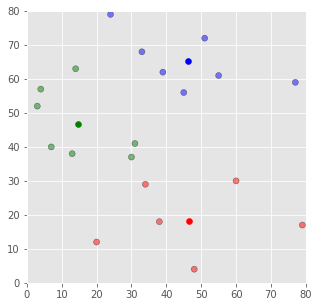

In [237]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'], color=colors1,alpha=0.5, edgecolor='k')
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


In [238]:
c = pd.read_csv('/content/Mall_Customers.csv')
df2 = pd.DataFrame(c)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [239]:
pip install category_encoders

In [240]:
df2.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [241]:
import missingno as msno
import category_encoders as ce
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [242]:
encoder= ce.OrdinalEncoder(cols=['Gender'],return_df=True,
                           mapping=[{'col':'Gender','mapping':{'None':0,'Male':1,'Female':2}}]
                           )
df2 = encoder.fit_transform(df2)
df2.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40


In [243]:
df2.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


In [245]:
df2 = df2.drop(columns=['CustomerID','Gender'])

In [246]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [247]:
df2.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True) # Renaming column names


In [248]:
df2.columns

Index(['Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [249]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

style.use('ggplot')

In [250]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [251]:
labels = kmeans.predict(df2)
centroids = kmeans.cluster_centers_

In [252]:
df2

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


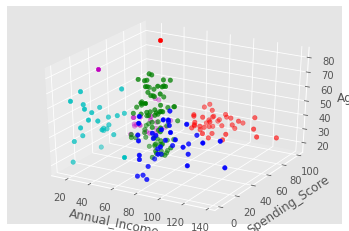

In [253]:
fig2 = plt.figure()
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x,y,z, c=colors1,marker='o')
for idx,centroid in enumerate(centroids):
  ax2.scatter(*centroid,color=colmap[idx+1])
ax2.set_xlabel('Annual_Income')
ax2.set_ylabel('Spending_Score')
ax2.set_zlabel('Age')
plt.show()